**LOGISTIC REGRESSION**

In [ ]:
!gdown --id "1etNhInSO3a6X2jgxHDAQ0UTcGk0KhsY4"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1etNhInSO3a6X2jgxHDAQ0UTcGk0KhsY4 



In [ ]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from scipy.ndimage import gaussian_filter

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

**LOAD DỮ LIỆU**

In [ ]:
df = pd.read_excel("NCKH_dachuanhoa.xlsx")
df.loc[:,:].head()

,Timestamp,Cau1,Cau2,Cau3,Cau4,Cau5,Cau6,Cau7,Cau8,Cau9,...,Cau29,Cau30,Cau31,Cau32,Cau33,Cau34,Cau35,Cau36,Cau37,Cau37*
0,2023-06-28 21:19:59.112,Nữ,Thanh Hóa,2003.0,Năm 2,Đại học Công nghệ TP.HCM (HUTECH),Khoa học tự nhiên,Công nghệ Thông tin,3,1,...,3,3,3,3,3,1,3,3,"ngu bỏ mẹ, đếch hiểu ý của câu hỏi",ChatGPT là ngừoi bạn thân thiện giúp chúng ta ...
1,2023-06-28 21:31:38.752,Nam,Ninh Thuận,2001.0,Năm 4,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ - kỹ thuật,Công nghệ Thông tin,3,1,...,5,5,4,5,4,2,4,5,Tốt,Giúp đỡ nhiều hơn
2,2023-06-28 21:45:53.565,Nam,Thanh Hóa,2003.0,Năm 2,Đại học Công nghệ TP.HCM (HUTECH),Khoa học tự nhiên,Khoa học dữ liệu,2,1,...,5,5,4,1,4,3,5,4,Không có ý kiến gì,Tôi nghĩ nó khá tiện ích cho tôi trong việc h...
3,2023-06-28 21:54:35.957,Nam,Thừa Thiên Huế,2003.0,Năm 2,Đại học Công nghệ TP.HCM (HUTECH),Công nghệ - kỹ thuật,Công nghệ Thông tin,0,1,...,3,4,3,3,3,3,5,5,Tốt,Tốt
4,2023-06-28 21:58:06.748,Nam,Hồ Chí Minh,2003.0,Năm 2,Đại học FPT (FPT),Công nghệ - kỹ thuật,Ngôn ngữ Anh,3,1,...,3,3,3,3,3,3,3,3,Cũng ok,Ok


In [ ]:
column_all_for_x = df.loc[:,"Cau8":'Cau36']
columns_to_select_x = column_all_for_x.drop(['Cau13',"Cau14'",'Cau14','Cau15','Cau16'], axis=1)
columns_to_select = ['Cau11','Cau12','Cau31','Cau25','Cau35','Cau20','Cau24','Cau36','Cau30','Cau23','Cau29']
# ,"Cau24*", 'Cau26'
X = df[columns_to_select].copy()
y = df.loc[:,"Cau14'"].copy() # Target

In [ ]:
X.columns

Index(['Cau11', 'Cau12', 'Cau31', 'Cau25', 'Cau35', 'Cau20', 'Cau24', 'Cau36',
       'Cau30', 'Cau23', 'Cau29'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41, stratify=y)

**LOGISTIC REGRESSION**

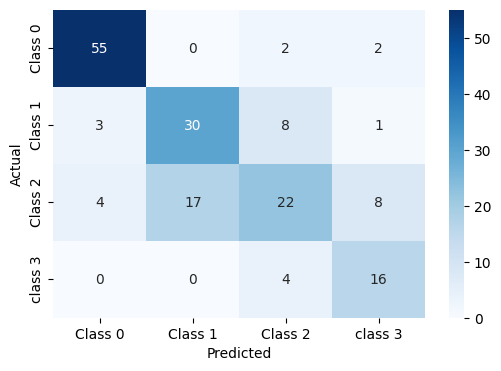

Accuracy: 0.7151162790697675


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(class_weight='balanced')

# Định ra các giá trị tham số để thử nghiệm
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000],
    'C': [0.1, 0.5, 1, 10, 100]
}

# Tìm kiếm các tham số tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Sử dụng tham số tối ưu để đào tạo mô hình
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình trên tập kiểm tra
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
# plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

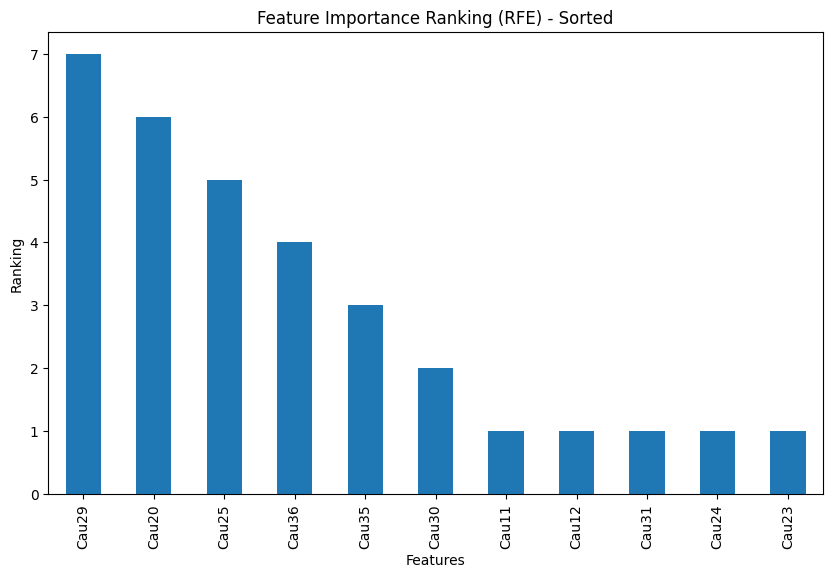

In [ ]:
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

# Sử dụng RFE để đánh giá tầm quan trọng của các đặc trưng
rfe = RFE(estimator=best_model)
model_fit = rfe.fit(X_train, y_train)

# Lấy chỉ số của các đặc trưng được chọn
selected_features = pd.Series(data=model_fit.ranking_, index=X_train.columns)

# Chọn chỉ các đặc trưng có rank bằng 1
signi_feat_rfe = selected_features[selected_features == 1].index

# Sắp xếp chỉ số của các đặc trưng được chọn theo rank
sorted_features = selected_features.sort_values(ascending=False)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng sau khi sử dụng RFE (đã sắp xếp)
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Feature Importance Ranking (RFE) - Sorted')
plt.show()

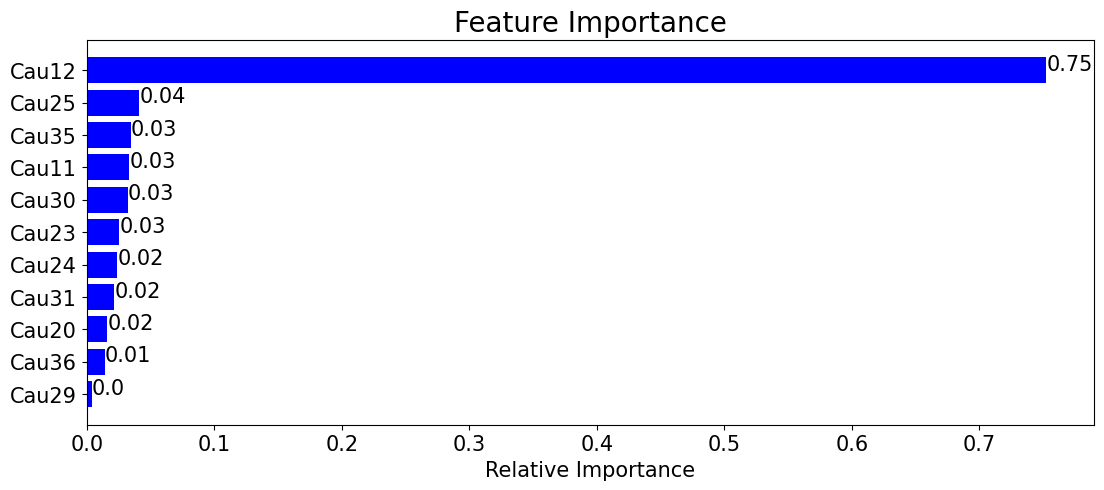

('Cau11',
 'Cau12',
 'Cau31',
 'Cau25',
 'Cau35',
 'Cau20',
 'Cau24',
 'Cau36',
 'Cau30',
 'Cau19',
 'Cau23',
 'Cau28',
 'Cau29')

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


perm_importance = permutation_importance(best_model, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()

'Cau11','Cau12','Cau31','Cau25','Cau35','Cau20','Cau24','Cau36','Cau30','Cau19','Cau23','Cau28','Cau29'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_column_charts(df, column_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Biểu đồ tròn
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
    axes[0].set_title(f'Pie Chart for {column_name}')

    # Biểu đồ cột
    sns.countplot(x=column_name, data=df, palette='viridis', ax=axes[1])
    axes[1].set_title(f'Column Chart for {column_name}')

    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng:
# # Thay 'TenCot' bằng tên cột bạn muốn vẽ
# plot_column_charts(df, 'TenCot')
def view_data(df, name):
  for i in range(1,5):
    df_12 = df[df["Cau14'"]==i]
    plot_column_charts(df_12, name)


In [ ]:
import pandas as pd
def delete_noise_threshold( df_name):
  for column in df_name.columns:
    if column != "Cau14'":
      value_counts = df_name[column].value_counts(normalize=True)
      # Xác định và loại bỏ giá trị nhiễu dựa trên phân phối xác suất của feature
      threshold = 0.05
      noise_values = value_counts[value_counts < threshold].index
      df_name = df_name[~df_name[column].isin(noise_values)]
  return df_name



def delete_noise(df):
  df_n = []
  for i in range(1,5):
    df_name = df[df["Cau14'"] == i]
    df_name = delete_noise_threshold(df_name)
    df_n.append(df_name)
  return df_n



df_1 = df[['Cau11','Cau12',"Cau14'",'Cau31','Cau25','Cau35','Cau20','Cau24','Cau36','Cau30','Cau19','Cau23','Cau28','Cau29']].copy()
df_n = delete_noise(df_1)

n = len(df_n[0]) + len(df_n[1])+ len(df_n[2])+ len(df_n[3])
print(n)

635


In [ ]:
print(len(df_n[0]))
print(len(df_n[1]))
print( len(df_n[2]))
print( len(df_n[3]))

232
128
202
73


In [ ]:
import pandas as pd
from sklearn.utils import shuffle

def concat_and_shuffle(dataframes):
    # Hợp toàn bộ dữ liệu từ danh sách DataFrame
    concatenated_df = pd.concat(dataframes, ignore_index=True)

    # Xáo trộn dữ liệu
    shuffled_df = shuffle(concatenated_df).reset_index(drop=True)

    return shuffled_df

# Example usage:
# df_n là danh sách các DataFrame
df_combined = concat_and_shuffle(df_n)


In [ ]:
columns_to_select = ['Cau11','Cau12','Cau31','Cau25','Cau35','Cau20','Cau24','Cau36','Cau30','Cau19','Cau23','Cau28','Cau29']

# ,"Cau24*", 'Cau26'
X = df_combined[columns_to_select].copy()
y = df_combined["Cau14'"].copy() # Target
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=41)

In [ ]:
y_train.value_counts()

1    186
3    166
2     97
4     59
Name: Cau14', dtype: int64

In [ ]:
y_test.value_counts()

1    46
3    36
2    31
4    14
Name: Cau14', dtype: int64

**chạy model Logistic sau khi lọc nhiễu**

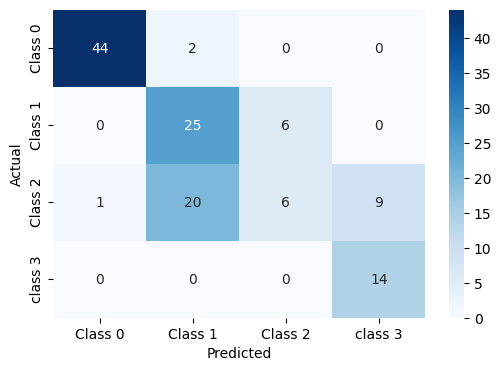

Accuracy: 0.7007874015748031


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model = LogisticRegression(class_weight='balanced')

# Định ra các giá trị tham số để thử nghiệm
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000],
    'C': [0.1, 0.5, 1, 10, 100]
}

# Tìm kiếm các tham số tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Sử dụng tham số tối ưu để đào tạo mô hình
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình trên tập kiểm tra
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
# plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

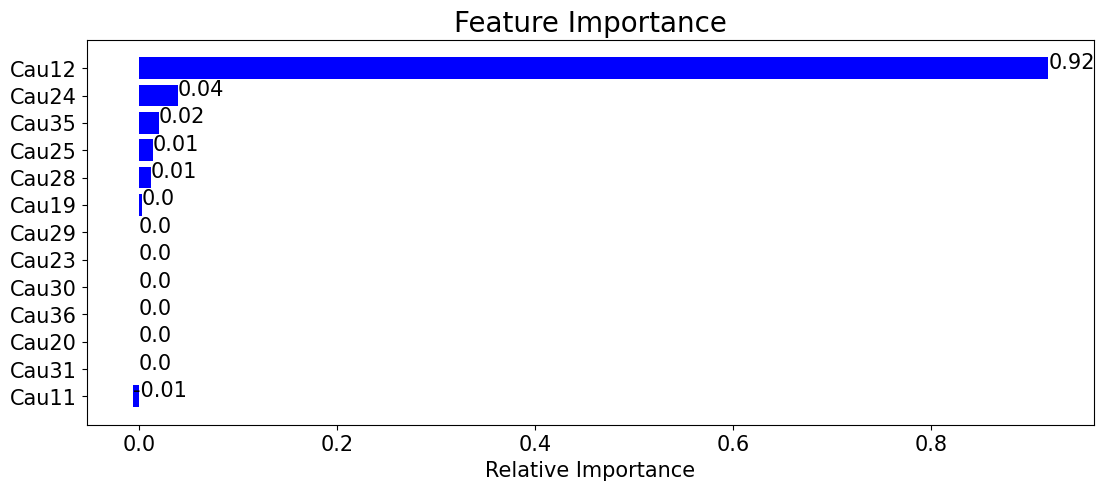

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt


perm_importance = permutation_importance(best_model, X_train, y_train)

# Making the sum of feature importance being equal to 1.0,
# so feature importance can be understood as percentage
perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

# Feature's name (considering your X a DataFrame)
feature_names = X.columns
features = np.array(feature_names)

# Sort to plot in order of importance
sorted_idx = perm_importance_normalized.argsort()

# Plotting
plt.figure(figsize=(13,5))
plt.title('Feature Importance',fontsize=20)
plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
plt.xlabel('Relative Importance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for index, value in enumerate(perm_importance_normalized[sorted_idx]):
    plt.text(value, index,
             str(round(value,2)), fontsize=15)

plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Giả sử bạn có một danh sách các DataFrame df_list, mỗi DataFrame tương ứng với một nhãn

# Số lượng dữ liệu mới bạn muốn tạo
num_new_samples = 1000

# Mảng để lưu trữ dữ liệu mới
new_data_list = []

# Duyệt qua từng nhãn
for df_label in df_n:
    # Duyệt qua từng feature của mỗi nhãn
    new_data = pd.DataFrame()
    for feature in df_label.columns:
        if feature != "Cau14'":
          # Tính toán các tham số của phân phối (mean và standard deviation)
          mean_feature = df_label[feature].mean()
          std_dev_feature = df_label[feature].std()

          # Tạo dữ liệu mới cho từng feature dựa trên phân phối xác suất của feature hiện có
          new_samples_feature = np.random.normal(loc=mean_feature, scale=std_dev_feature, size=num_new_samples)

          # Thêm feature mới vào DataFrame mới
          new_data[feature] = new_samples_feature

    # Thêm DataFrame mới vào danh sách
    new_data_list.append(new_data)

# new_data_list chứa các DataFrame mới, mỗi DataFrame có dữ liệu mới cho mỗi nhãn và feature tương ứng


In [ ]:
new_data_list[0]

,Cau11,Cau12,Cau31,Cau25,Cau35,Cau20,Cau24,Cau36,Cau30,Cau19,Cau23,Cau28,Cau29
0,2.575557,1.277364,1.972488,2.079215,4.435110,1.685555,1.127713,2.642351,3.602861,1.891991,3.299844,1.433931,0.305135
1,2.225947,1.288049,3.060180,3.518438,3.626466,2.742879,2.039925,3.487893,2.842888,3.547986,1.044355,2.805746,2.425947
2,0.601018,1.457644,2.822519,2.252534,3.306228,1.617642,3.291518,3.735080,3.251543,5.149966,2.613243,1.061108,1.948788
3,1.306885,0.497877,1.393663,2.088584,1.142504,0.641975,2.613784,3.583966,3.108145,1.664500,3.211652,1.362706,1.439212
4,1.013322,1.098064,2.951086,2.249537,2.172726,2.532049,4.089565,3.705084,2.818170,1.681820,2.864307,2.634206,1.910023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.664145,0.207415,2.896742,2.554391,2.532085,0.788836,2.383909,2.288433,1.910981,2.210781,1.537922,1.569377,2.957645
996,2.728683,1.457020,3.037368,2.948590,5.086695,1.946332,2.393547,2.314103,3.285492,3.260695,2.793193,2.076816,2.030020
997,2.016435,0.291867,3.020666,1.978589,3.303997,1.467248,2.916097,2.270983,2.685458,4.464514,1.736228,2.267423,2.575022
998,0.510177,1.420211,3.289491,2.023607,2.905824,1.941417,1.009366,2.167648,3.283955,3.663623,3.199282,1.120405,2.447449


In [ ]:
new_data_list[0]["Cau14'"]=1
new_data_list[1]["Cau14'"]=2
new_data_list[2]["Cau14'"]=3
new_data_list[3]["Cau14'"]=4

In [ ]:
new_df= concat_and_shuffle(new_data_list)

In [ ]:
new_df.to_csv("data sampling gpt.csv")

In [ ]:
combined_df = pd.concat([df_combined, new_df], ignore_index=True)

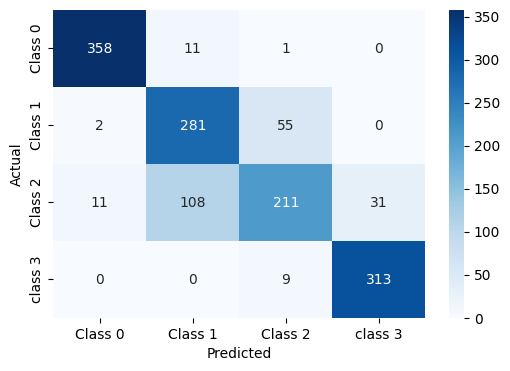

Accuracy: 0.8360891445003594


In [ ]:
columns_to_select = ['Cau11','Cau12','Cau31','Cau25','Cau35','Cau20','Cau24','Cau36','Cau30','Cau19','Cau23','Cau28','Cau29']

# ,"Cau24*", 'Cau26'
X = combined_df[columns_to_select].copy()
y = combined_df["Cau14'"].copy() # Target
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=41,stratify=y)

model = LogisticRegression(class_weight='balanced')

# Định ra các giá trị tham số để thử nghiệm
param_grid = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000],
    'C': [0.1, 0.5, 1, 10, 100]
}

# Tìm kiếm các tham số tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Sử dụng tham số tối ưu để đào tạo mô hình
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình trên tập kiểm tra
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate the confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "class 3"],
            yticklabels=["Class 0", "Class 1", "Class 2", "class 3"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
# plt.title(f"Confusion Matrix (C={param['C']}, gamma={param['gamma']}, kernel={param['kernel']}, degree={param['degree']})")
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

LƯU MODEL

In [ ]:
# Lưu model
import pickle
filename = 'logistic_regression.pkl'

# Lưu mô hình vào tệp pkl
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

# Đọc model
import pickle

# Đọc mô hình từ tệp pkl
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

**DecisionTreeClassifier**

Cau12: 0.5013208897738838
Cau11: 0.07830814519084128
Cau35: 0.06346215866130714
Cau28: 0.04626921350474049
Cau19: 0.045597767709033454
Cau30: 0.044181416522758185
Cau20: 0.034847075512873055
Cau36: 0.03302681940762207
Cau23: 0.03244677502932539
Cau31: 0.03217648983058024
Cau25: 0.03070162925479933
Cau24: 0.029445232561181423
Cau29: 0.02821638704105427


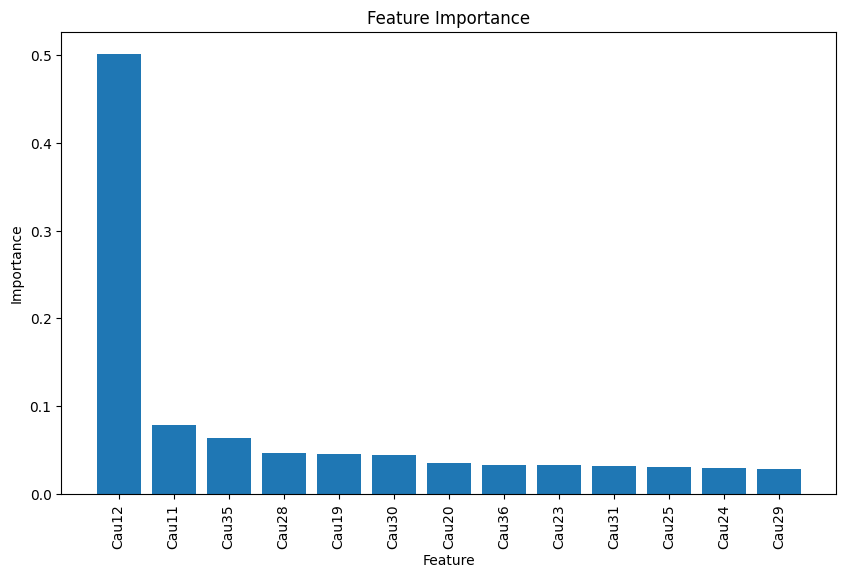

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Xây dựng mô hình
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Lấy đặc trưng quan trọng từ mô hình
feature_importances = clf.feature_importances_

# Hiển thị đặc trưng quan trọng theo thứ tự giảm dần
indices = np.argsort(feature_importances)[::-1]
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]}: {feature_importances[indices[f]]}")

# Vẽ biểu đồ đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

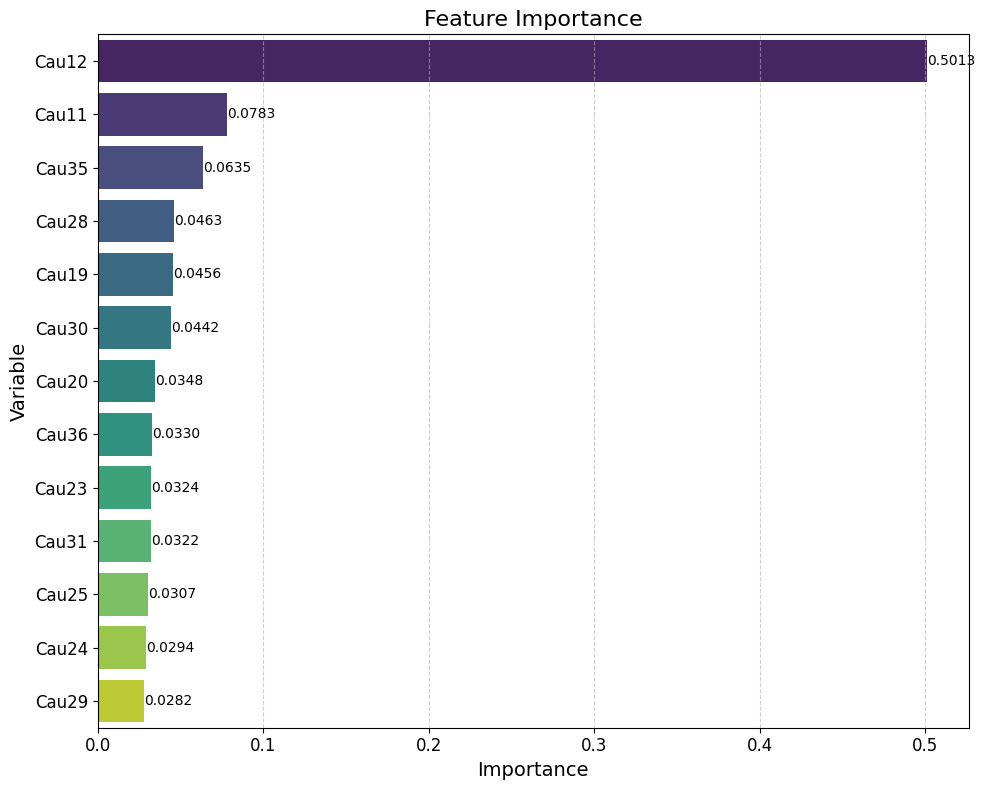

In [ ]:
# Tính feature importance
feature_importance = clf.feature_importances_

# Tạo một DataFrame để hiển thị thông tin
import pandas as pd
feature_importance_df = pd.DataFrame({'Variable': X_train.columns, 'Importance': feature_importance})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị biểu đồ cột về độ quan trọng của các biến
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Variable', data=feature_importance_df, palette='viridis')

# Thêm tiêu đề và định dạng
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Variable', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị giá trị của độ quan trọng trên từng cột
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')

# Hiển thị lưới để dễ đọc
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tăng khoảng cách giữa các cột để dễ nhìn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()